<a href="https://colab.research.google.com/github/chang-ho-jeon/text_data_analysis/blob/main/naver_movie_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- 데이터 출처: https://github.com/e9t/nsmc/

In [1]:
import pandas as pd

# 데이터가 저장되어있는 repository에서 곧장 불러옴, 구분자(tab)
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/refs/heads/master/ratings_train.txt', sep = '\t')
df.head()

id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1

# EDA

In [3]:
# shape
df.shape

(150000, 3)

In [5]:
# null
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [7]:
# label 분포
id_distributeed = df['id'].value_counts()
print(id_distributeed)

id
9976970     1
10273360    1
1064244     1
8357599     1
7636134     1
           ..
8867980     1
7129770     1
6310338     1
2745807     1
9619869     1
Name: count, Length: 150000, dtype: int64


In [8]:
document_distributeed = df['document'].value_counts()
print(document_distributeed)

document
굿                                                                                                  181
good                                                                                                92
최고                                                                                                  85
쓰레기                                                                                                 79
별로                                                                                                  66
                                                                                                  ... 
이런거 만드는 색휘는 진짜 일부로 욕처묵고싶어서 환장한색휘인듯                                                                   1
이영화 평점이 궁금해서 왔는데.너무높다..^^                                                                            1
시청자들에게 사과하세여 제작진..낚시성 예고 지친다..보기싫음 말아라 하고 만듬?조세호씨 때문에 넘웃기게 보는데요 낚시그만하시고 예고와 본방이 이어지는 연출부탁드립니다..      1
여태본 영화중 단연 최고                                                   

In [9]:
label_distributeed = df['label'].value_counts()
print(label_distributeed)

label
0    75173
1    74827
Name: count, dtype: int64


In [10]:
# 텍스트 길이


In [11]:
# 워드 클라우드

import matplotlib.pyplot as plt
from wordcloud import WordCloud
!apt-get install -y fonts-nanum
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fm.fontManager.addfont(fontpath)
plt.rcParams['font.family'] = 'NanumBarunGothic'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,833 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [12]:
text = df['document']
text

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [14]:
import pandas as pd
from collections import Counter

# 모든 문서를 하나의 텍스트로 결합 후, 단어 분리
all_words = ' '.join(df['document'].astype(str)).split()

# 각 단어가 몇 번 등장하는지 계산
word_count = Counter(all_words)

print(word_count)


Counter({'영화': 10825, '너무': 8239, '정말': 7791, '진짜': 5929, '이': 5059, '영화.': 3598, '왜': 3285, '더': 3260, '이런': 3249, '그냥': 3237, '수': 2945, '영화를': 2759, '잘': 2644, '다': 2615, '보고': 2557, '좀': 2449, '영화는': 2426, '그': 2421, '영화가': 2418, '본': 2298, '최고의': 2219, 'ㅋㅋ': 2019, '내가': 2000, '없는': 1957, '이건': 1889, '이렇게': 1828, '완전': 1780, '평점': 1760, '봤는데': 1746, '있는': 1739, '좋은': 1726, '이거': 1710, '이게': 1676, '보는': 1600, '평점이': 1595, '내': 1595, '다시': 1583, '그리고': 1547, '참': 1508, '많이': 1478, '역시': 1466, '난': 1405, '연기': 1365, '재밌게': 1343, '한': 1323, '쓰레기': 1295, '것': 1277, '하는': 1236, '또': 1231, '아': 1204, '드라마': 1186, '꼭': 1181, '가장': 1178, '보면': 1176, 'ㅋㅋㅋ': 1108, '마지막': 1070, '스토리': 1020, '무슨': 999, 'ㅋ': 989, '없고': 981, '.': 981, '볼': 959, 'ㅠㅠ': 958, '같은': 956, '없다.': 950, '끝까지': 940, '대한': 936, '안': 933, '만든': 923, '솔직히': 920, '넘': 903, '봐도': 897, '말이': 866, '하지만': 864, '전혀': 863, '뭐': 859, '10점': 841, '영화의': 841, '내내': 836, '아주': 829, '최악의': 812, '지금': 807, '..': 796, 'ㅎㅎ': 793, '할': 790, 

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# ... (rest of your code) ...

# Data Cleaning
stop_words = set(stopwords.words('english')) # Or your desired language

# Convert the Pandas Series 'text' to a single string
text_str = ' '.join(text.astype(str).tolist()) # Convert Pandas Series to a string

all_words = [word for word in word_tokenize(text_str) if not word.lower() in stop_words and word.isalnum()]

# Recalculate word_count after cleaning
word_count = Counter(all_words)

# Convert to weighted string
text = ' '.join([word for word, count in word_count.items() for _ in range(count)])

# Generate word cloud with customization
wordcloud = WordCloud(font_path=fontpath, background_color="white", width=800, height=800,
                      max_words=100, max_font_size=80, colormap='viridis').generate(text)

# ... (rest of your code to display the word cloud) ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


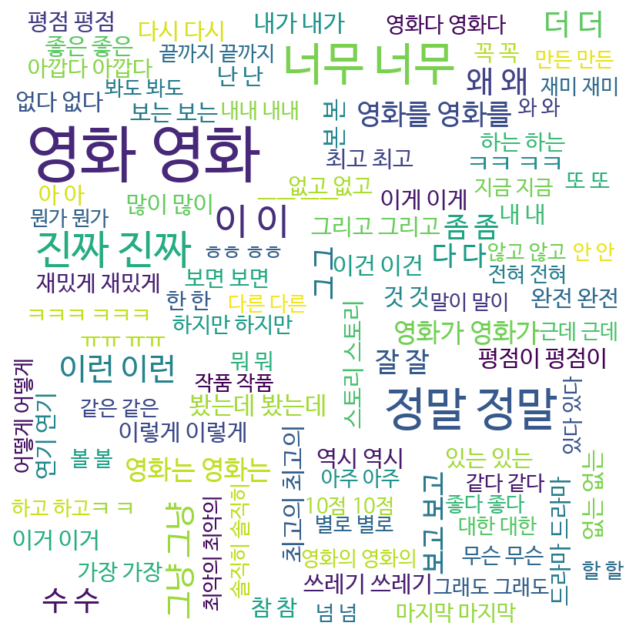

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()